# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [37]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [38]:
np.random.seed(11)
A = st.norm.rvs(scale=30, loc=11, size=100)
B = A + st.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи

st.ttest_ind(A,B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

Порог значимости не был пройден, как следствие мы не можем отвергнуть нулевую гипотезу

<AxesSubplot: ylabel='Count'>

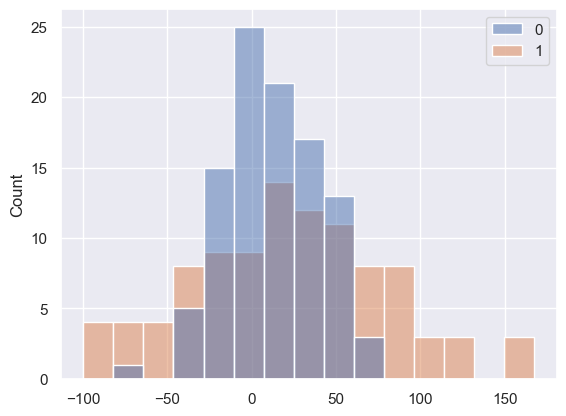

In [39]:
sns.set_theme()
sns.histplot([A,B], bins=15)

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [40]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

dictionary = {'water':water, 'nutri':nutri,'mineral':mineral}

In [41]:
f, p = st.f_oneway(water, nutri, mineral)
p

2.9240047906326853e-05

Различие точно присутствует

In [42]:
groups = list(dictionary.keys())
names = []
for k1 in range(len(dictionary)):
    for k2 in range(len(dictionary[groups[k1]])):
        names.append(groups[k1])

endg = water.copy()
endg.extend(nutri)
endg.extend(mineral)

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=endg, groups=names, alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1 group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
mineral  nutri   1.8571 0.0001  0.8419  2.8723   True
mineral  water   0.0405 0.9951 -0.9873  1.0683  False
  nutri  water  -1.8167 0.0002 -2.8445 -0.7889   True
-----------------------------------------------------


Тут в целом все говорит само за себя, давайте это представим графиком:

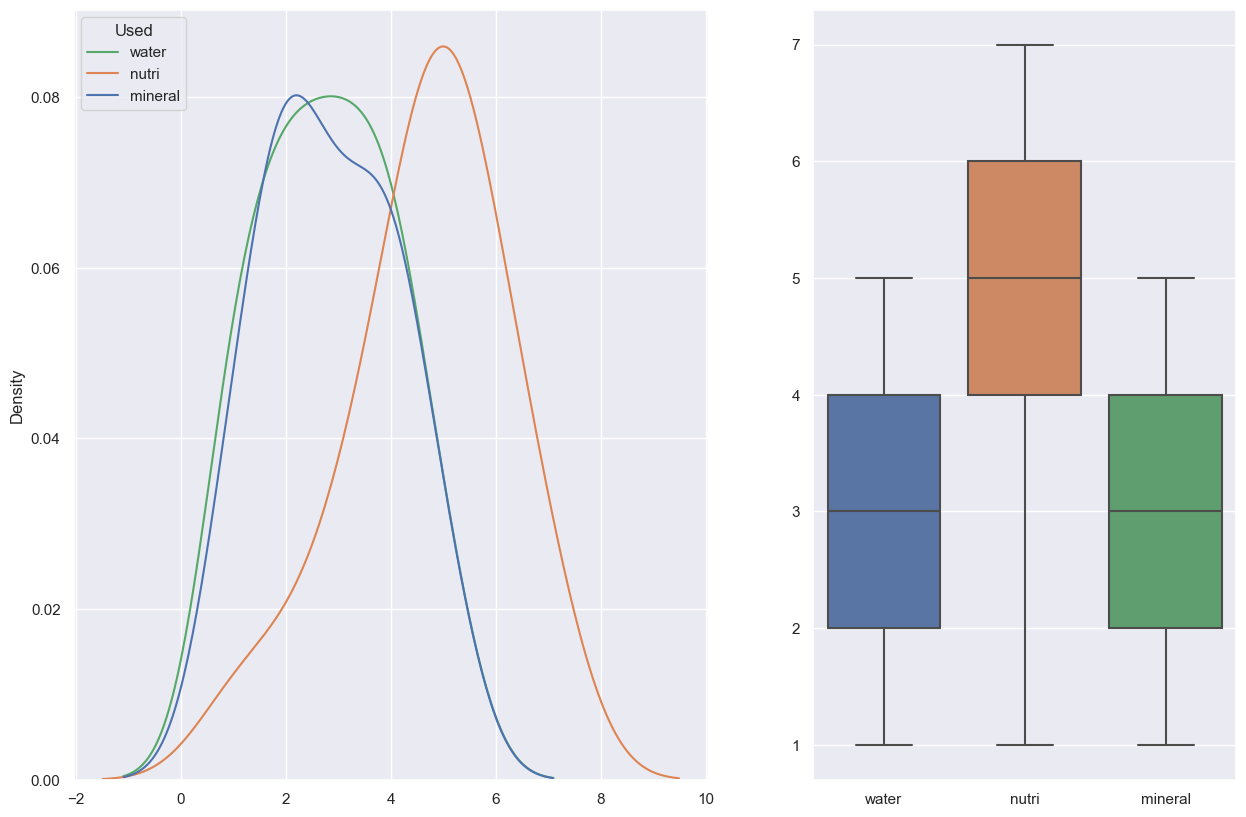

In [44]:
fig, axs = plt.subplots(1,2, width_ratios=[3,2])

sns.kdeplot(data=[water,nutri,mineral], ax=axs[0], legend='full')
sns.boxplot(data=[water,nutri,mineral], ax=axs[1])


fig.set_figwidth(15)
fig.set_figheight(10)
axs[0].legend(title='Used', loc='upper left', labels=groups)
axs[1].set_xticklabels(groups)

plt.show()

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [45]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

C:\Users\baakh\AppData\Local\Temp\ipykernel_14936\974058101.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [46]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


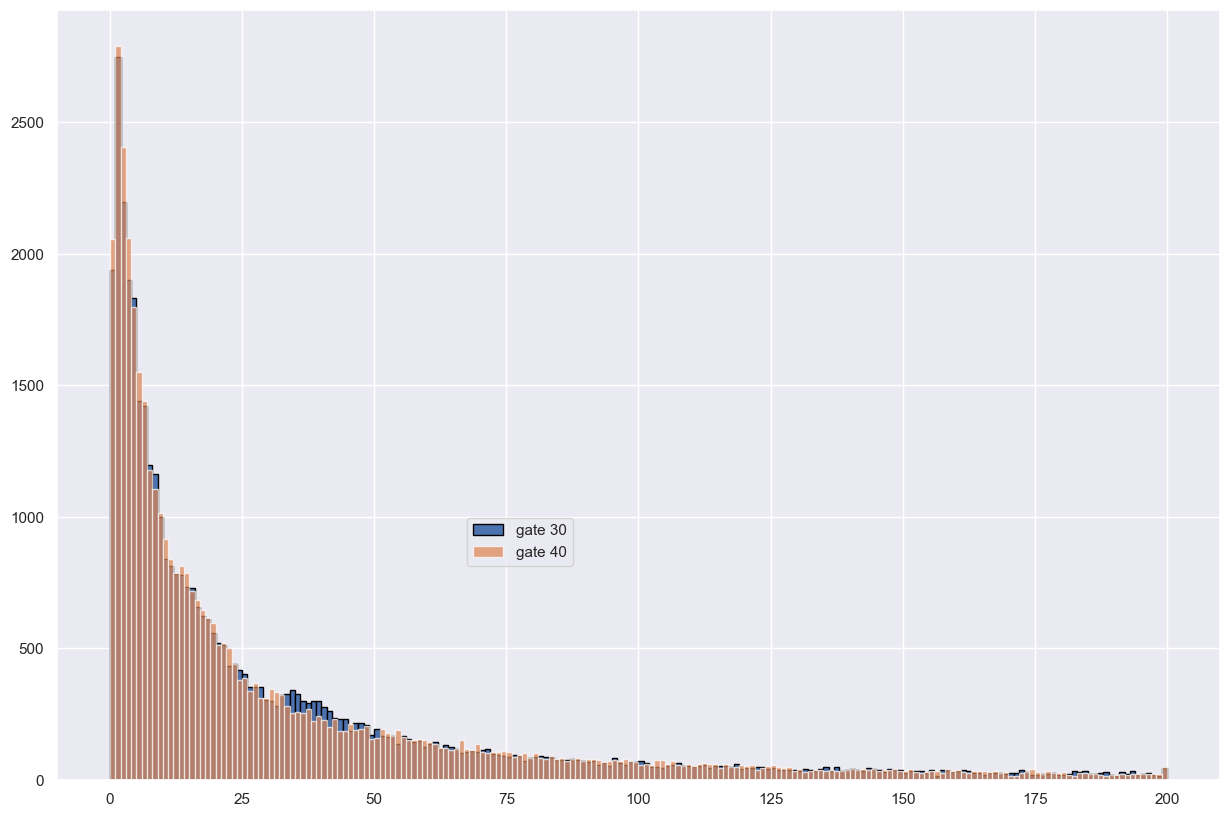

In [47]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

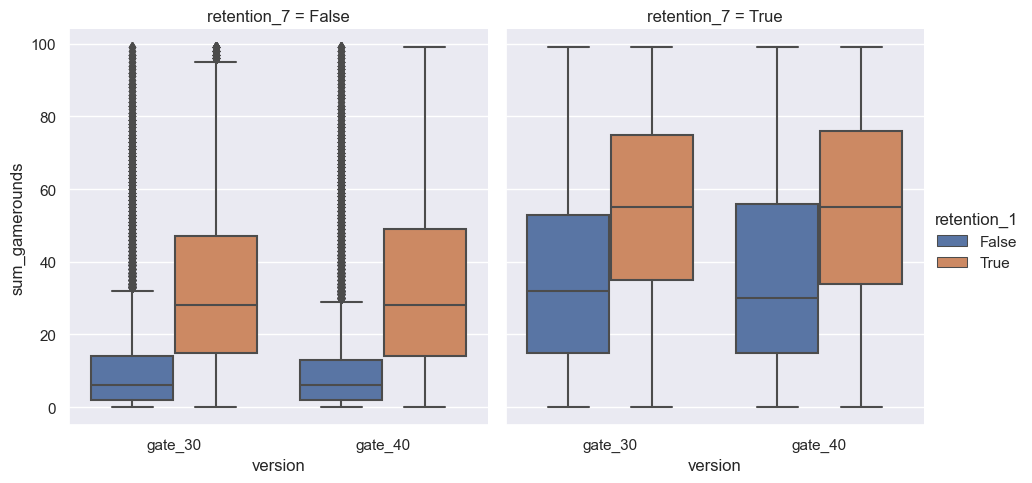

In [48]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

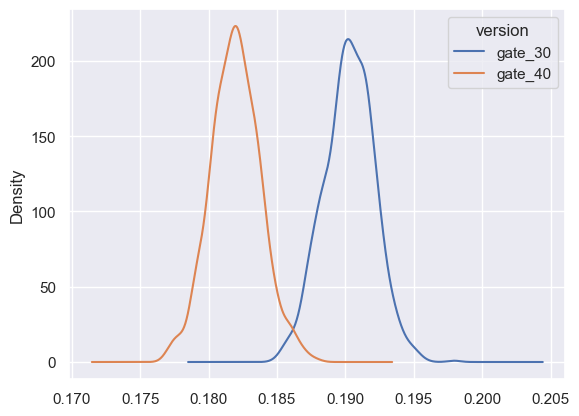

In [49]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

К сожалению вы ее не убрали. Но я разобрал почему она работает. Переписывать просто не вижу смысла

In [50]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print(f, p)
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

0.7939569526814368 0.3729086824696095
Statistics=1024331250.500, p=0.050


Ниже, пожалуйста, напишите Ваши выводы на основании решения:

По Манна-Уитни значение находится на границе, что усложняет нам принятие решения. Давайте для уверенности прогоним через бутстрап.

In [51]:
from tqdm.auto import tqdm
from scipy.stats import norm
import numpy as np
alpha = 0.05

def get_bootstrap(
    data_column_1,                    # Числовые значения первой выборки
    data_column_2,                    # Числовые значения второй выборки
    boot_it = 1000,                   # Количество бутстрэп-подвыборок
    statistic = np.mean,              # Интересующая нас статистика
    bootstrap_conf_level = 1-alpha    # Уровень значимости
):
    
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):    # Извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True            # Параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len,                 # Чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()

    print('p-value: %.8f' % p_value)

    return p_value

  0%|          | 0/1000 [00:00<?, ?it/s]

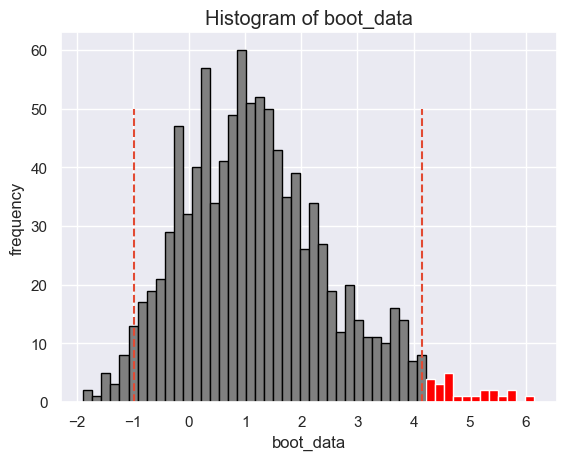

p-value: 0.36555452
Не отвергаем нулевую гипотезу о том, что стат. значимое различие отсутствует


In [52]:
tmp_boot = get_bootstrap(
    data[data['version'] == 'gate_30']['sum_gamerounds'],                 # числовые значения первой выборки
    data[data['version'] == 'gate_40']['sum_gamerounds'],                 # числовые значения второй выборки
    boot_it = 1000,                 # количество бутстрэп-подвыборок
    statistic = np.mean,            # интересующая нас статистика
    bootstrap_conf_level = 1-alpha  # уровень значимости
)

if (tmp_boot < alpha):
    print('Отвергаем нулевую гипотезу о том, что стат. значимое различие отсутствует')
else:
    print('Не отвергаем нулевую гипотезу о том, что стат. значимое различие отсутствует')

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [53]:
# Откроем датасет

import pandas as pd

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

C:\Users\baakh\AppData\Local\Temp\ipykernel_14936\520085065.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [54]:
def sorter(row_):
    classes = {'Rock', 'Grass'}
    if row_['Class 1'] in classes  and row_['Class 2'] in classes :
        return None
    elif row_['Class 1'] == 'Grass' or row_['Class 2'] == 'Grass':
        return 'Grass'
    elif row_['Class 1'] == 'Rock' or row_['Class 2'] == 'Rock':
        return 'Rock'
    else:
        return None

pokemon['type_sort'] = pokemon.apply(sorter, axis=1)
pkmn = pokemon.dropna().copy()

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

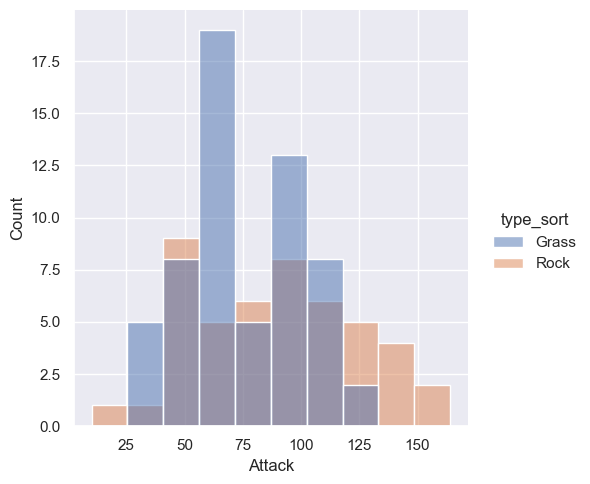

In [56]:
sns.displot(data=pkmn, x='Attack', hue='type_sort', bins=10)

In [57]:
import scipy.stats as st

stat, p = st.ttest_ind(pkmn[pkmn['type_sort'] == 'Grass']['Attack'], pkmn[pkmn['type_sort'] == 'Rock']['Attack'], alternative='greater')
print(stat, p)

-2.281792594791952 0.9877406442258474


Отвергаем нулевую гипотезу о том, что сила атаки класса Grass выше атаки класса Rock

**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [58]:
def sorter(row_):
    classes = {'Water', 'Normal'}
    if row_['Class 1'] in classes  and row_['Class 2'] in classes :
        return None
    elif row_['Class 1'] == 'Water' or row_['Class 2'] == 'Water':
        return 'Water'
    elif row_['Class 1'] == 'Normal' or row_['Class 2'] == 'Normal':
        return 'Normal'
    else:
        return None

pokemon['type_sort'] = pokemon.apply(sorter, axis=1)
pkmn = pokemon.dropna().copy()

In [59]:
stat, p = st.ttest_ind(pkmn[pkmn['type_sort'] == 'Water']['Speed'], pkmn[pkmn['type_sort'] == 'Normal']['Speed'], alternative='greater')
print(stat, p)

-2.6959902565784013 0.9959065296379592


Мы не можем отвергнуть нулевую гипотезу о том, что покемоны в классе `Water` в среднем не быстрее покемонов в классе `Normal`

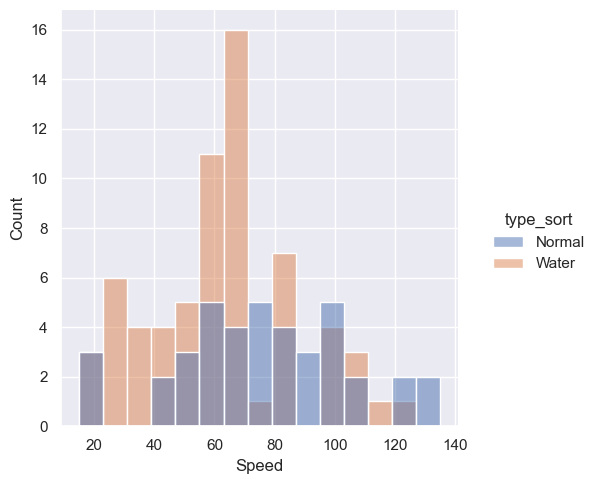

In [60]:
sns.displot(data=pkmn, x='Speed', hue='type_sort', bins=15)

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [61]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [62]:
pkmn_tr = pokemon[pokemon['Name'].isin(treathed_pokemon)].copy()
pkmn =  pokemon[~pokemon['Name'].isin(treathed_pokemon)].copy()

Распределение то норм, а вот значений многовато, так что возьмем только небольшую часть сэмплом.Провел тест 10 раз для того чтобы убедиться, что разброс невелик при оценке с разными sample

In [63]:
for i in range(10):
    stat, p = st.ttest_ind(pkmn_tr['Speed'], pkmn['Speed'].sample(20), equal_var=False, alternative='greater')
    print(stat, p)

10.416807399460426 5.004015521556835e-10
10.874926788916435 5.49585222453581e-10
9.658336089338926 1.8547472601246222e-09
8.010981963874542 3.0807801973767856e-08
6.874531230820509 3.319554795967288e-07
10.03226958288142 1.011230543293615e-09
10.610364054281668 6.26507887984788e-10
11.219173451240167 1.124730036591373e-09
13.363443278138583 2.5567309701016104e-11
11.024653663782832 4.0508730111912425e-10


Нулевую гипотезу о том, что сывроротка не ускоряет покемонов отклоняем

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [64]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,type_sort
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,None
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,None
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,None
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,None
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,None


In [65]:
pkmn = pokemon.copy()
pkmn['charsum'] = pkmn['HP'] + pkmn['Attack'] + pkmn['Defense']
pkmn['charmult'] = pkmn['HP'] * pkmn['Attack'] * pkmn['Defense']

Поскольку обе группы имеют довольно большую длину - возьму сэмплы

In [66]:
stat, p = st.ttest_ind(pkmn[pkmn['Legendary'] == True]['charsum'].sample(25), pkmn[pkmn['Legendary'] == False]['charsum'].sample(25), alternative='greater')
print(stat, p)
stat, p = st.ttest_ind(pkmn[pkmn['Legendary'] == True]['charmult'].sample(25), pkmn[pkmn['Legendary'] == False]['charmult'].sample(25), alternative='greater')
print(stat, p)

4.861218726445176 6.455775353763127e-06
6.070326219003591 9.789059661021407e-08


Опять же показывает, что нулевую гипотезу о том, что данные значительно не отличаются в обоих случаях отклоняем.

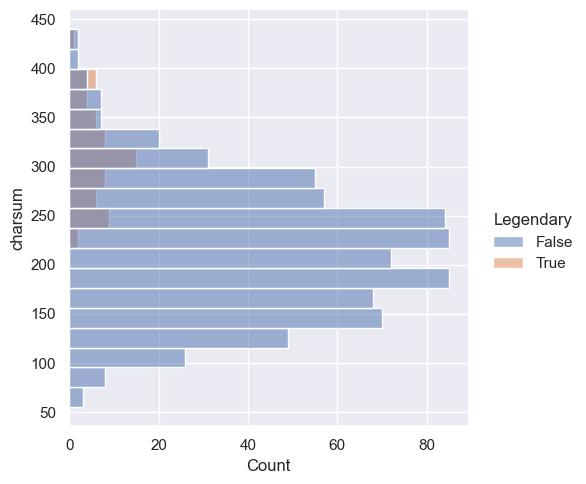

In [67]:
sns.displot(data=pkmn, y='charsum', hue='Legendary')

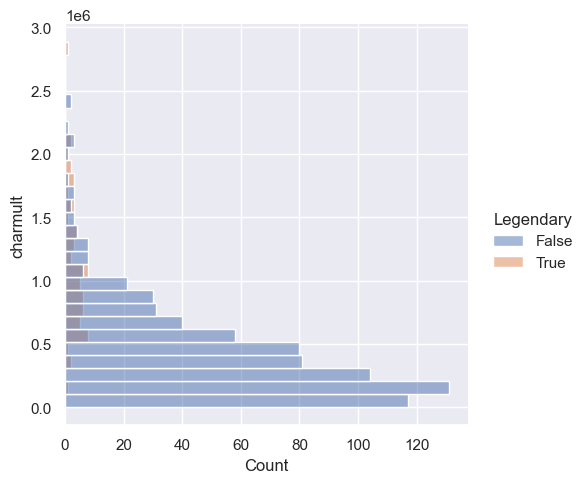

In [68]:
sns.displot(data=pkmn, y='charmult', hue='Legendary')

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [70]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,type_sort
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,None
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,None
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,None
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,None
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,None


In [71]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']

In [72]:
def sorter(row_):
    classes = {'Water', 'Normal'}
    if row_['Class 1'] in best_defence_class  and row_['Class 2'] in best_defence_class :
        return None
    elif row_['Class 1'] == 'Rock' or row_['Class 2'] == 'Rock':
        return 'Rock'
    elif row_['Class 1'] == 'Ground' or row_['Class 2'] == 'Ground':
        return 'Ground'
    elif row_['Class 1'] == 'Steel' or row_['Class 2'] == 'Steel':
        return 'Steel'
    elif row_['Class 1'] == 'Ice' or row_['Class 2'] == 'Ice':
        return 'Ice'
    else:
        return None

pokemon['type_sort'] = pokemon.apply(sorter, axis=1)
pkmn = pokemon.dropna().copy()

In [73]:
pkmn

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,type_sort
36,37,Nidoqueen,Poison,Ground,90,92,87,75,85,76,False,Ground
39,40,Nidoking,Poison,Ground,81,102,77,85,75,85,False,Ground
88,89,Magnemite,Electric,Steel,25,35,70,95,55,45,False,Steel
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,False,Steel
94,95,Dewgong,Water,Ice,90,70,80,70,95,70,False,Ice
...,...,...,...,...,...,...,...,...,...,...,...,...
773,774,Carbink,Rock,Fairy,50,50,150,50,150,50,False,Rock
777,778,Klefki,Steel,Fairy,57,80,91,80,87,75,False,Steel
794,795,Zygarde Half Forme,Dragon,Ground,108,100,121,81,95,95,True,Ground
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,Rock


In [74]:
f, p = st.f_oneway(pkmn[pkmn['type_sort'] == 'Ground']['Sp. Def'], pkmn[pkmn['type_sort'] == 'Rock']['Sp. Def'], pkmn[pkmn['type_sort'] == 'Steel']['Sp. Def'], pkmn[pkmn['type_sort'] == 'Ice']['Sp. Def'])
p

0.32362850227228146

Действительно не можем отвергнуть нулевую гипотезу о том, что присутствует какое-либо стат. значимое различие. Визуализируем

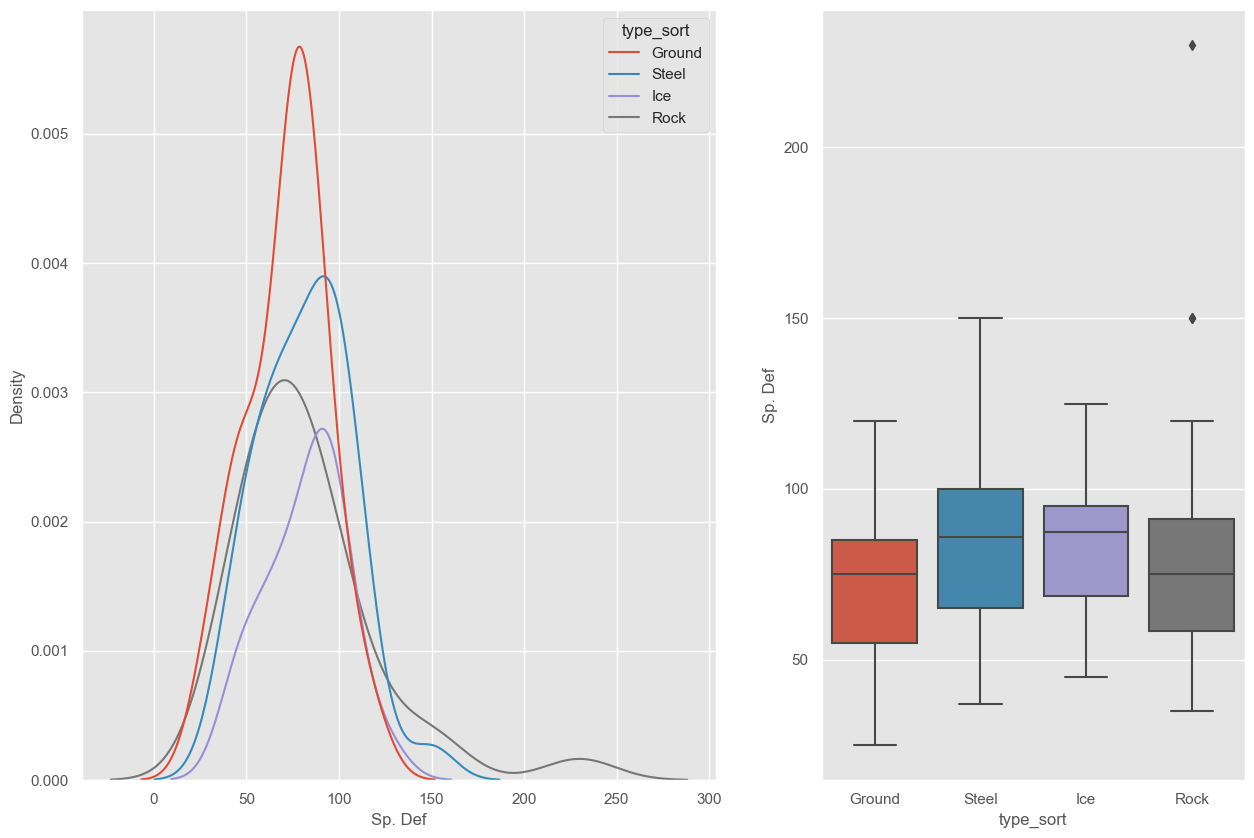

In [54]:
fig, axs = plt.subplots(1,2, width_ratios=[3,2])

sns.kdeplot(data=pkmn, x='Sp. Def', hue='type_sort', ax=axs[0], legend='full')
sns.boxplot(data=pkmn, y='Sp. Def', x='type_sort', ax=axs[1])


fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()